# ***Modelo 2 - Random Forest - SVC - Gradient Boosting***

## ***1. Conexión al Drive***

In [2]:
try:
  from google.colab import drive
  drive.mount('/content/drive')
  print("Drive montado correctamente.")
except ModuleNotFoundError:
  print("No estás en Colab, omitiendo montaje de Drive.")

Mounted at /content/drive
Drive montado correctamente.


## ***2. Librerias***

In [3]:
import pandas as pd
import numpy as np
import joblib
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import os

## ***3. Cargar datos procesados***

In [4]:
def cargar_datos(paths):
    X_train = pd.read_csv(paths['X_train'])
    y_train = pd.read_csv(paths['y_train']).iloc[:,0]
    X_test = pd.read_csv(paths['X_test'])
    y_test = pd.read_csv(paths['y_test']).iloc[:,0]
    print("Datos cargados correctamente.")
    return X_train, y_train, X_test, y_test

## ***4. Evaluar modelo***

In [5]:
def evaluar_modelo(model, X_test, y_test, title='Modelo'):
    y_pred = model.predict(X_test)
    try:
        y_proba = model.predict_proba(X_test)[:, 1]
    except:
        try:
            y_proba = model.decision_function(X_test)
        except:
            y_proba = None

    print(f"Reporte de Clasificación - {title}:")
    print(classification_report(y_test, y_pred))

    if y_proba is not None:
        roc_auc = roc_auc_score(y_test, y_proba)
        print(f"ROC AUC: {roc_auc:.4f}")
    else:
        print("No se pudo calcular ROC AUC para este modelo.")

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
    plt.title(f'Matriz de Confusión - {title}')
    plt.xlabel('Predicción')
    plt.ylabel('Verdadero')
    plt.show()


## ***5. Guardar modelo***

In [6]:
def guardar_modelo(model, path):
    """
    Guarda el modelo en un archivo.
    """
    carpeta = os.path.dirname(path)
    if not os.path.exists(carpeta):
        os.makedirs(carpeta)
    joblib.dump(model, path)
    print(f"Modelo guardado en: {path}")

## ***6. Pipeline completo***

### ***6.1 Pipeline Ramdom Forest***

In [7]:
def pipeline_rf(paths, n_estimators=100, random_state=42):
    """
    Ejecuta el pipeline de modelo Random Forest.
    """
    X_train, y_train, X_test, y_test = cargar_datos(paths)
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=random_state)
    model.fit(X_train, y_train)
    print("Random Forest entrenado.")
    evaluar_modelo(model, X_test, y_test, 'Random Forest')
    guardar_modelo(model, paths['modelo_guardado'])

### ***6.2 Pipeline SVM***

In [8]:
def pipeline_svm(paths, kernel='rbf', C=1.0, probability=True, random_state=42):
    """
    Ejecuta el pipeline de modelo SVM.
    """
    X_train, y_train, X_test, y_test = cargar_datos(paths)
    model = SVC(kernel=kernel, C=C, probability=probability, random_state=random_state)
    model.fit(X_train, y_train)
    print("SVM entrenado.")
    evaluar_modelo(model, X_test, y_test, 'SVM')
    guardar_modelo(model, paths['modelo_guardado'])

### ***6.3 Pipeline Gradient Boosting***

In [9]:
def pipeline_gb(paths, n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42):
    """
    Ejecuta el pipeline de modelo Gradient Boosting.
    """
    X_train, y_train, X_test, y_test = cargar_datos(paths)
    model = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=learning_rate,
                                       max_depth=max_depth, random_state=random_state)
    model.fit(X_train, y_train)
    print("Gradient Boosting entrenado.")
    evaluar_modelo(model, X_test, y_test, 'Gradient Boosting')
    guardar_modelo(model, paths['modelo_guardado'])

## ***7. Ejecutar pipeline***

In [11]:
if __name__ == '__main__':
    paths_rf = {
        'X_train': '/content/drive/MyDrive/cod/Health/HealthProjectG8/data/X_train.csv',
        'y_train': '/content/drive/MyDrive/cod/Health/HealthProjectG8/data/y_train.csv',
        'X_test': '/content/drive/MyDrive/cod/Health/HealthProjectG8/data/X_test.csv',
        'y_test': '/content/drive/MyDrive/cod/Health/HealthProjectG8/data/y_test.csv',
        'modelo_guardado': '/content/drive/MyDrive/cod/Health/HealthProjectG8/models/rf_model.pkl'
    }
    paths_svm = {
        'X_train': '/content/drive/MyDrive/cod/Health/HealthProjectG8/data/X_train.csv',
        'y_train': '/content/drive/MyDrive/cod/Health/HealthProjectG8/data/y_train.csv',
        'X_test': '/content/drive/MyDrive/cod/Health/HealthProjectG8/data/X_test.csv',
        'y_test': '/content/drive/MyDrive/cod/Health/HealthProjectG8/data/y_test.csv',
        'modelo_guardado': '/content/drive/MyDrive/cod/Health/HealthProjectG8/models/svm_model.pkl'
    }
    paths_gb = {
        'X_train': '/content/drive/MyDrive/cod/Health/HealthProjectG8/data/X_train.csv',
        'y_train': '/content/drive/MyDrive/cod/Health/HealthProjectG8/data/y_train.csv',
        'X_test': '/content/drive/MyDrive/cod/Health/HealthProjectG8/data/X_test.csv',
        'y_test': '/content/drive/MyDrive/cod/Health/HealthProjectG8/data/y_test.csv',
        'modelo_guardado': '/content/drive/MyDrive/cod/Health/HealthProjectG8/models/gb_model.pkl'
    }




### ***7.1 Entrenando Random Forest***

Entrenando Random Forest...
Datos cargados correctamente.
Random Forest entrenado.
Reporte de Clasificación - Random Forest:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2289
           1       0.93      0.99      0.96       711

    accuracy                           0.98      3000
   macro avg       0.96      0.98      0.97      3000
weighted avg       0.98      0.98      0.98      3000

ROC AUC: 0.9988


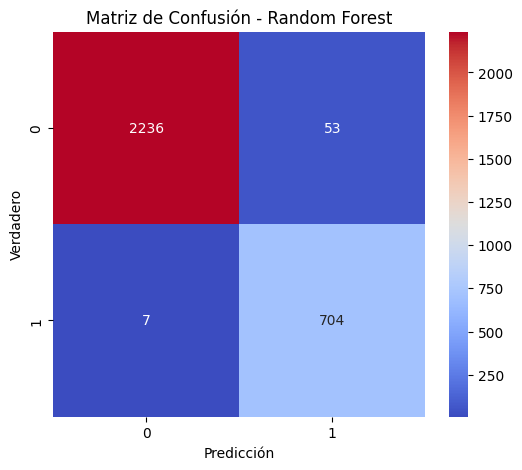

Modelo guardado en: /content/drive/MyDrive/cod/Health/HealthProjectG8/models/rf_model.pkl


In [12]:
print("Entrenando Random Forest...")
pipeline_rf(paths_rf)

### ***7.2 Entrenando SVM***

Entrenando SVM...
Datos cargados correctamente.
SVM entrenado.
Reporte de Clasificación - SVM:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98      2289
           1       0.87      1.00      0.93       711

    accuracy                           0.96      3000
   macro avg       0.93      0.98      0.95      3000
weighted avg       0.97      0.96      0.96      3000

ROC AUC: 1.0000


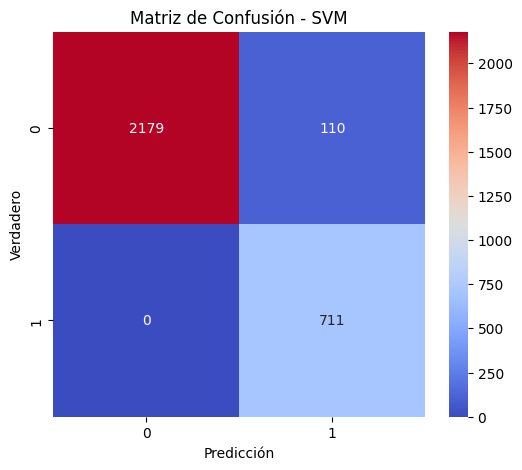

Modelo guardado en: /content/drive/MyDrive/cod/Health/HealthProjectG8/models/svm_model.pkl


In [13]:
print("Entrenando SVM...")
pipeline_svm(paths_svm)

### ***7.3 Entrenando Gradient Boosting***

Entrenando Gradient Boosting...
Datos cargados correctamente.
Gradient Boosting entrenado.
Reporte de Clasificación - Gradient Boosting:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2289
           1       0.93      1.00      0.96       711

    accuracy                           0.98      3000
   macro avg       0.97      0.99      0.98      3000
weighted avg       0.98      0.98      0.98      3000

ROC AUC: 0.9999


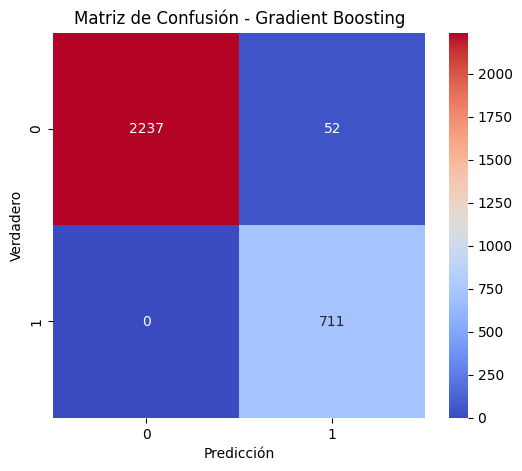

Modelo guardado en: /content/drive/MyDrive/cod/Health/HealthProjectG8/models/gb_model.pkl


In [14]:
print("Entrenando Gradient Boosting...")
pipeline_gb(paths_gb)

## ***8. Comparación de modelos con métricas***

In [15]:
# Función para evaluar un modelo y obtener las métricas
def obtener_metricas(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else model.decision_function(X_test)

    # Calcular las métricas de rendimiento
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    report = classification_report(y_test, y_pred, output_dict=True)

    # Sacar los valores de precision, recall, f1-score para la clase positiva
    precision = report['1']['precision']
    recall = report['1']['recall']
    f1 = report['1']['f1-score']

    return accuracy, roc_auc, precision, recall, f1

In [16]:
# Resultados de los modelos
modelos = ['Regresión Logística', 'Random Forest', 'SVM', 'Gradient Boosting']
metrics = []

In [17]:
# Cargar los modelos entrenados
logistic_model = joblib.load('/content/drive/MyDrive/cod/Health/HealthProjectG8/models/logistic_model.pkl')
rf_model = joblib.load('/content/drive/MyDrive/cod/Health/HealthProjectG8/models/rf_model.pkl')
svm_model = joblib.load('/content/drive/MyDrive/cod/Health/HealthProjectG8/models/svm_model.pkl')
gb_model = joblib.load('/content/drive/MyDrive/cod/Health/HealthProjectG8/models/gb_model.pkl')


In [18]:
# Cargar datos de prueba
X_test = pd.read_csv('/content/drive/MyDrive/cod/Health/HealthProjectG8/data/X_test.csv')
y_test = pd.read_csv('/content/drive/MyDrive/cod/Health/HealthProjectG8/data/y_test.csv').iloc[:, 0]

In [19]:
# Evaluar los modelos
for model, name in zip([logistic_model, rf_model, svm_model, gb_model], modelos):
    accuracy, roc_auc, precision, recall, f1 = obtener_metricas(model, X_test, y_test)
    metrics.append([name, accuracy, roc_auc, precision, recall, f1])

In [20]:
# Convertir a dataframe para mejor visualización
metrics_df = pd.DataFrame(metrics, columns=['Modelo', 'Accuracy', 'ROC AUC', 'Precision', 'Recall', 'F1-score'])
print(metrics_df)

                Modelo  Accuracy   ROC AUC  Precision    Recall  F1-score
0  Regresión Logística  0.994000  0.999999   0.975309  1.000000  0.987500
1        Random Forest  0.980000  0.998811   0.929987  0.990155  0.959128
2                  SVM  0.963333  0.999985   0.866017  1.000000  0.928198
3    Gradient Boosting  0.982667  0.999937   0.931848  1.000000  0.964722


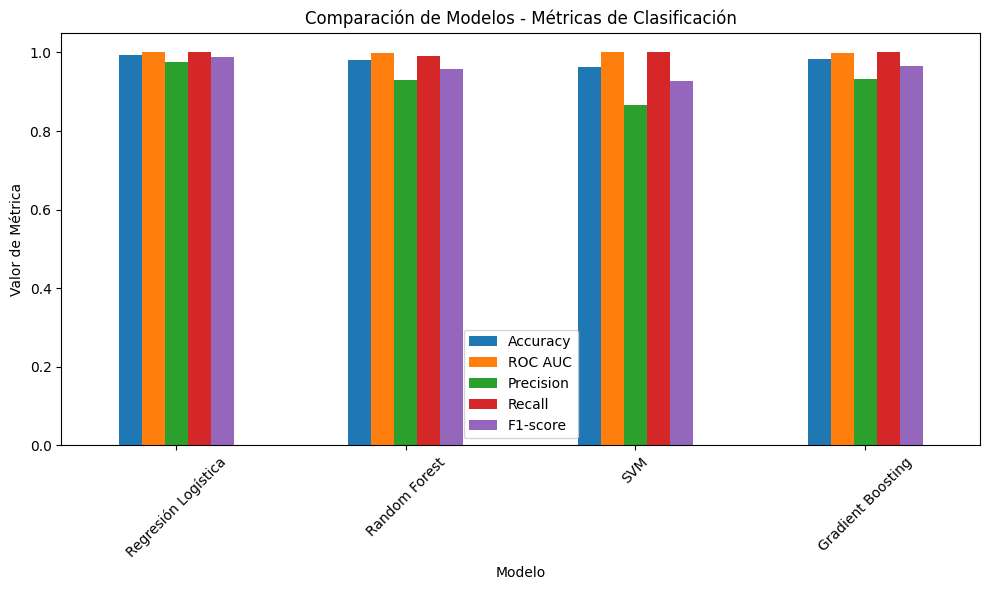

In [22]:
# Gráfico de comparación de métricas
metrics_df.set_index('Modelo').plot(kind='bar', figsize=(10, 6))
plt.title('Comparación de Modelos - Métricas de Clasificación')
plt.ylabel('Valor de Métrica')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## ***9. Ajustes de hiperparametros***

In [23]:
# Definir las rutas para cargar los datos
paths = {
    'X_train': '/content/drive/MyDrive/cod/Health/HealthProjectG8/data/X_train.csv',
    'y_train': '/content/drive/MyDrive/cod/Health/HealthProjectG8/data/y_train.csv',
    'X_test': '/content/drive/MyDrive/cod/Health/HealthProjectG8/data/X_test.csv',
    'y_test': '/content/drive/MyDrive/cod/Health/HealthProjectG8/data/y_test.csv'
}

# Llamar a la función para cargar los datos
X_train, y_train, X_test, y_test = cargar_datos(paths)

Datos cargados correctamente.


### ***9.1 Ajuste de Hiperparámetros con GridSearchCV para Random Forest***

In [40]:
# Definir los parámetros a buscar
param_grid_rf = {
    'n_estimators': [100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [41]:
# Crear el modelo de Random Forest
rf = RandomForestClassifier(random_state=42)


In [42]:
# Usar GridSearchCV para buscar los mejores hiperparámetros
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/util

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100]},
             verbose=2)

In [43]:
# Ver los mejores parámetros y el mejor modelo
print("Mejores parámetros encontrados para Random Forest: ", grid_search_rf.best_params_)
best_rf_model = grid_search_rf.best_estimator_

Mejores parámetros encontrados para Random Forest:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


Reporte de Clasificación - Random Forest Optimizado:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2289
           1       0.93      0.99      0.96       711

    accuracy                           0.98      3000
   macro avg       0.96      0.98      0.97      3000
weighted avg       0.98      0.98      0.98      3000

ROC AUC: 0.9988


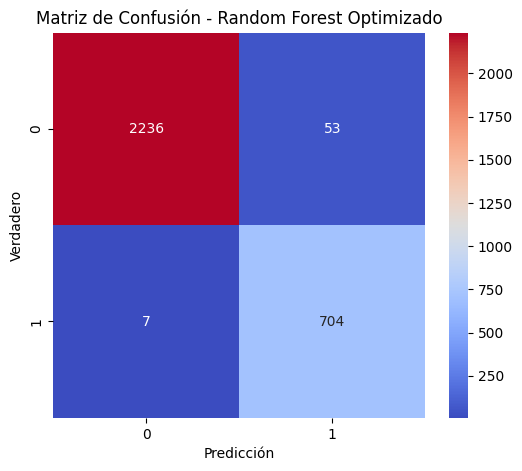

In [44]:
# Evaluar el mejor modelo
evaluar_modelo(best_rf_model, X_test, y_test, 'Random Forest Optimizado')

### ***9.2 Ajuste de Hiperparámetros con GridSearchCV para SVM***

In [27]:
# Definir los parámetros a buscar
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
}

In [28]:
# Crear el modelo de SVM
svm = SVC(random_state=42)

In [29]:
# Usar GridSearchCV para buscar los mejores hiperparámetros
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=5, n_jobs=-1, verbose=2)
grid_search_svm.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             verbose=2)

In [30]:
# Ver los mejores parámetros y el mejor modelo
print("Mejores parámetros encontrados para SVM: ", grid_search_svm.best_params_)
best_svm_model = grid_search_svm.best_estimator_

Mejores parámetros encontrados para SVM:  {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


Reporte de Clasificación - SVM Optimizado:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2289
           1       0.97      1.00      0.98       711

    accuracy                           0.99      3000
   macro avg       0.98      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000

ROC AUC: 1.0000


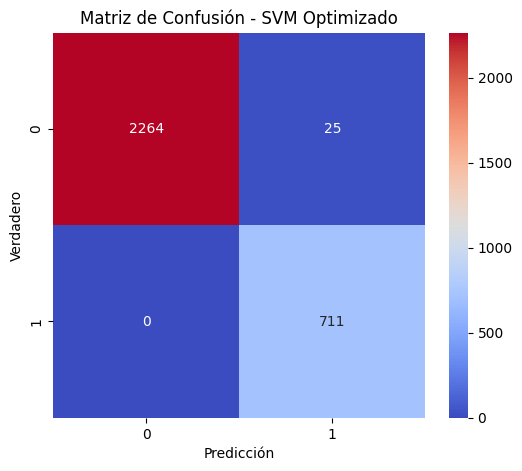

In [31]:
# Evaluar el mejor modelo
evaluar_modelo(best_svm_model, X_test, y_test, 'SVM Optimizado')

### ***9.3 Ajuste de Hiperparámetros con RandomizedSearchCV para Gradient Boosting***

In [35]:
# Definir los parámetros a buscar
param_dist_gb = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0]
}

In [36]:
# Crear el modelo de Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)

In [37]:
# Usar RandomizedSearchCV para buscar los mejores hiperparámetros
random_search_gb = RandomizedSearchCV(estimator=gb, param_distributions=param_dist_gb, n_iter=100, cv=5, n_jobs=-1, verbose=2)
random_search_gb.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 72 is smaller than n_iter=100. Running 72 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [50, 100],
                                        'subsample': [0.8, 0.9, 1.0]},
                   verbose=2)

In [38]:
# Ver los mejores parámetros y el mejor modelo
print("Mejores parámetros encontrados para Gradient Boosting: ", random_search_gb.best_params_)
best_gb_model = random_search_gb.best_estimator_

Mejores parámetros encontrados para Gradient Boosting:  {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.2}


Reporte de Clasificación - Gradient Boosting Optimizado:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2289
           1       0.96      1.00      0.98       711

    accuracy                           0.99      3000
   macro avg       0.98      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000

ROC AUC: 0.9999


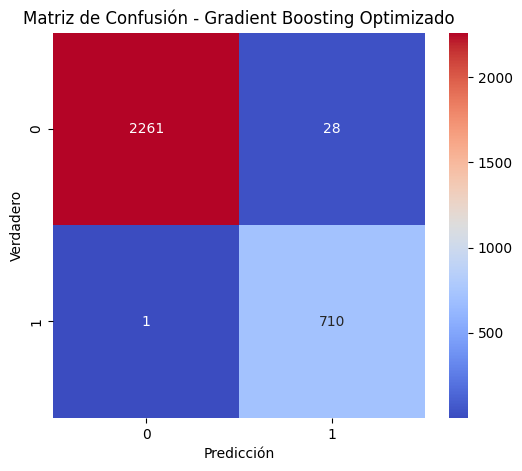

In [39]:
# Evaluar el mejor modelo
evaluar_modelo(best_gb_model, X_test, y_test, 'Gradient Boosting Optimizado')